In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv("iris_dataset_2D.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X

,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


### K-Means Clustering

In [36]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [37]:
cluster_centers

array([[-2.22019328,  0.29222482],
       [ 0.61198392, -0.79925263],
       [ 1.71890108,  0.65217008]])

Text(0.5, 1.0, 'Clustered Data for K=3')

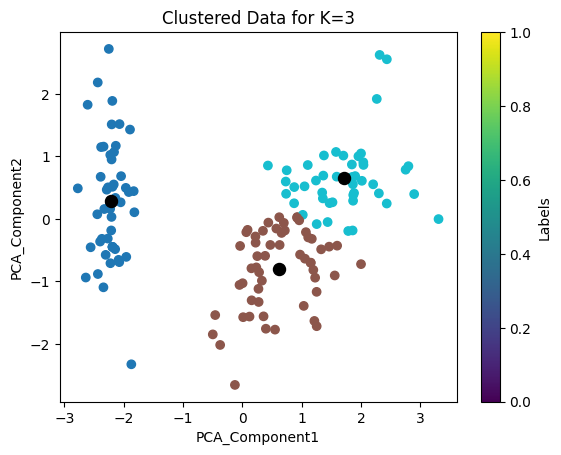

In [38]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=cluster_labels, cmap='tab10')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black', s=75)
plt.colorbar(label="Labels")
plt.xlabel("PCA_Component1")
plt.ylabel("PCA_Component2")
plt.title("Clustered Data for K=3")

#### Inertia / Distortion Measure

In [39]:
inertia = kmeans.inertia_
print("Inertia for K=3 is:", inertia)

Inertia for K=3 is: 116.24247259315793


#### Purity Score

In [40]:
total =  0

for cluster_id in range(kmeans.n_clusters):
    cluster_indices = np.where(cluster_id == cluster_labels)[0]
    true_labels = y.iloc[cluster_indices]
    
    most_freq = true_labels.mode()[0]
    freq = (true_labels == most_freq).sum()

    print(f'Cluster {cluster_id}: \nMost frequent element : {most_freq}  \nFrequency: {freq} \nPurity Score : {float(freq/len(true_labels)):.4f}')
    print("---------------------------------------------------")
    
    total += freq

print(f'\nPurity score for the whole data: {float(total/len(X)):.4f}')

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 50 
Purity Score : 1.0000
---------------------------------------------------
Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 39 
Purity Score : 0.7091
---------------------------------------------------
Cluster 2: 
Most frequent element : Iris-virginica  
Frequency: 34 
Purity Score : 0.7556
---------------------------------------------------

Purity score for the whole data: 0.8200


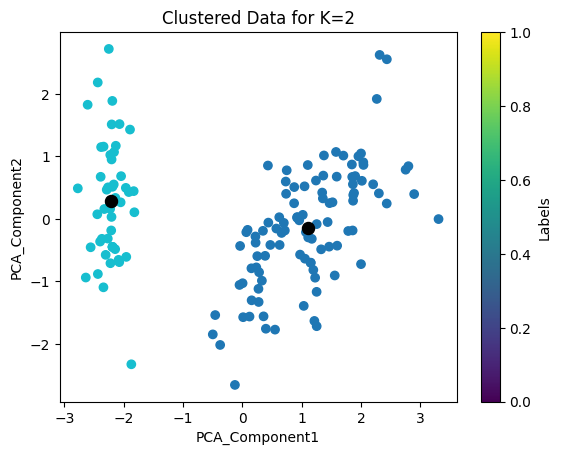

Cluster 0: 
Most frequent element : Iris-versicolor  
Frequency: 50 
Purity Score : 0.5000

Cluster 1: 
Most frequent element : Iris-setosa  
Frequency: 50 
Purity Score : 1.0000


Purity score for the whole data: 0.6667
--------------------------------------------------------------------------------------------


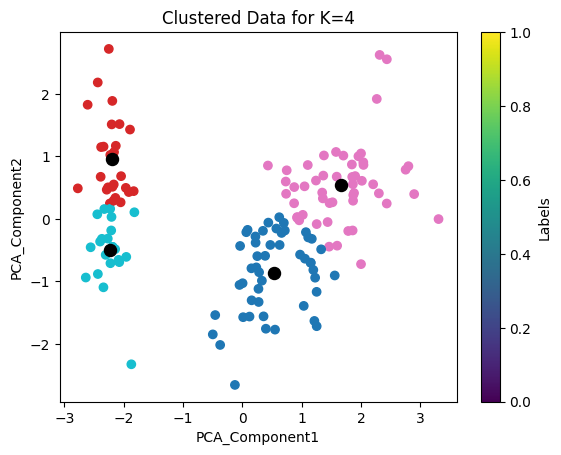

Cluster 0: 
Most frequent element : Iris-versicolor  
Frequency: 38 
Purity Score : 0.7755

Cluster 1: 
Most frequent element : Iris-setosa  
Frequency: 27 
Purity Score : 1.0000

Cluster 2: 
Most frequent element : Iris-virginica  
Frequency: 39 
Purity Score : 0.7647

Cluster 3: 
Most frequent element : Iris-setosa  
Frequency: 23 
Purity Score : 1.0000


Purity score for the whole data: 0.8467
--------------------------------------------------------------------------------------------


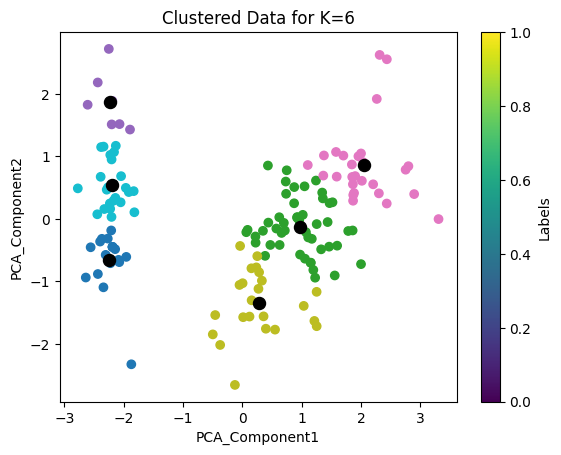

Cluster 0: 
Most frequent element : Iris-setosa  
Frequency: 18 
Purity Score : 1.0000

Cluster 1: 
Most frequent element : Iris-versicolor  
Frequency: 28 
Purity Score : 0.5833

Cluster 2: 
Most frequent element : Iris-setosa  
Frequency: 7 
Purity Score : 1.0000

Cluster 3: 
Most frequent element : Iris-virginica  
Frequency: 27 
Purity Score : 0.9643

Cluster 4: 
Most frequent element : Iris-versicolor  
Frequency: 21 
Purity Score : 0.8750

Cluster 5: 
Most frequent element : Iris-setosa  
Frequency: 25 
Purity Score : 1.0000


Purity score for the whole data: 0.8400
--------------------------------------------------------------------------------------------


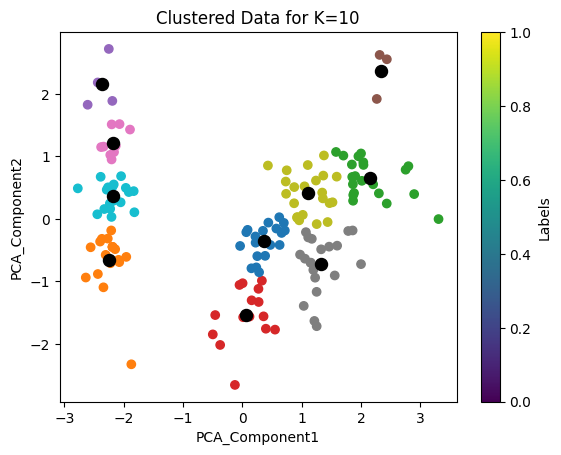

Cluster 0: 
Most frequent element : Iris-versicolor  
Frequency: 19 
Purity Score : 1.0000

Cluster 1: 
Most frequent element : Iris-setosa  
Frequency: 18 
Purity Score : 1.0000

Cluster 2: 
Most frequent element : Iris-virginica  
Frequency: 21 
Purity Score : 1.0000

Cluster 3: 
Most frequent element : Iris-versicolor  
Frequency: 14 
Purity Score : 0.9333

Cluster 4: 
Most frequent element : Iris-setosa  
Frequency: 4 
Purity Score : 1.0000

Cluster 5: 
Most frequent element : Iris-virginica  
Frequency: 3 
Purity Score : 1.0000

Cluster 6: 
Most frequent element : Iris-setosa  
Frequency: 9 
Purity Score : 1.0000

Cluster 7: 
Most frequent element : Iris-virginica  
Frequency: 15 
Purity Score : 0.7500

Cluster 8: 
Most frequent element : Iris-versicolor  
Frequency: 12 
Purity Score : 0.5455

Cluster 9: 
Most frequent element : Iris-setosa  
Frequency: 19 
Purity Score : 1.0000


Purity score for the whole data: 0.8933
-------------------------------------------------------------

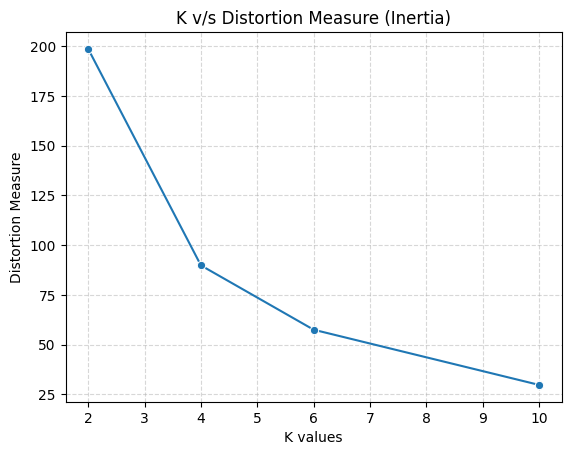

In [64]:
k_values = [2,4,6,10]
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)

    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    inertia = kmeans.inertia_
    inertias.append(inertia)

    plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=cluster_labels, cmap='tab10')
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black', s=75)
    plt.colorbar(label="Labels")
    plt.xlabel("PCA_Component1")
    plt.ylabel("PCA_Component2")
    plt.title(f'Clustered Data for K={k}')
    plt.show()

    total=0
    for cluster_id in range(kmeans.n_clusters):
        cluster_indices = np.where(cluster_id == cluster_labels)[0]
        true_labels = y.iloc[cluster_indices]
        
        most_freq = true_labels.mode()[0]
        freq = (true_labels == most_freq).sum()
    
        print(f'Cluster {cluster_id}: \nMost frequent element : {most_freq}  \nFrequency: {freq} \nPurity Score : {float(freq/len(true_labels)):.4f}')
        print()
        
        total += freq

    print(f'\nPurity score for the whole data: {float(total/len(X)):.4f}')
    print("--------------------------------------------------------------------------------------------")

sns.lineplot(x=k_values, y=inertias, marker='o')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel("K values")
plt.ylabel("Distortion Measure")
plt.title("K v/s Distortion Measure (Inertia)")
plt.show()

### Optimal k value = 4 according to the Elbow Curve
Applying K-Means for k=4

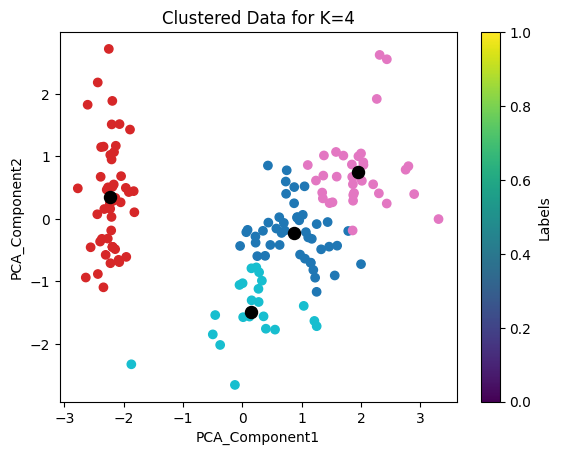

Cluster 0: 
Most frequent element : Iris-versicolor  
Frequency: 28 
Purity Score : 0.6222

Cluster 1: 
Most frequent element : Iris-setosa  
Frequency: 49 
Purity Score : 1.0000

Cluster 2: 
Most frequent element : Iris-virginica  
Frequency: 31 
Purity Score : 0.9118

Cluster 3: 
Most frequent element : Iris-versicolor  
Frequency: 19 
Purity Score : 0.8636


Purity score for the whole data: 0.8467


In [67]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X)
    
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

inertia = kmeans.inertia_
inertias.append(inertia)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=cluster_labels, cmap='tab10')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black', s=75)
plt.colorbar(label="Labels")
plt.xlabel("PCA_Component1")
plt.ylabel("PCA_Component2")
plt.title(f'Clustered Data for K=4')
plt.show()

total=0
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = np.where(cluster_id == cluster_labels)[0]
    true_labels = y.iloc[cluster_indices]
        
    most_freq = true_labels.mode()[0]
    freq = (true_labels == most_freq).sum()
    
    print(f'Cluster {cluster_id}: \nMost frequent element : {most_freq}  \nFrequency: {freq} \nPurity Score : {float(freq/len(true_labels)):.4f}')
    print()
        
    total += freq

print(f'\nPurity score for the whole data: {float(total/len(X)):.4f}')